In [114]:
import sympy as sp
from IPython.display import display
from matplotlib.ticker import EngFormatter

In [115]:
engf = EngFormatter()

class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [116]:
def cramers_rule(A,b):
    display(A)
    det_A = A.det()
    print(f"detA= {engf(det_A)}\n")

    if det_A == 0:
        raise ValueError("The $\det(A)$ is zero; the system has no unique solution.")
    
    solutions = []

    for i in range(A.cols):
        print(f'I={i}') #Be verbose about which iteration we are on
        
        A_i = A.copy() #
        A_i[:, i] = b
        display(A_i)
        
        det_Ai = A_i.det()
        print(f"det{i}= {engf(det_Ai)}")
        
        sol = det_Ai/det_A
        solutions.append(sol.evalf())
        print(f"sol{i}= {engf(sol)}\n")

    return solutions

## Problem 1

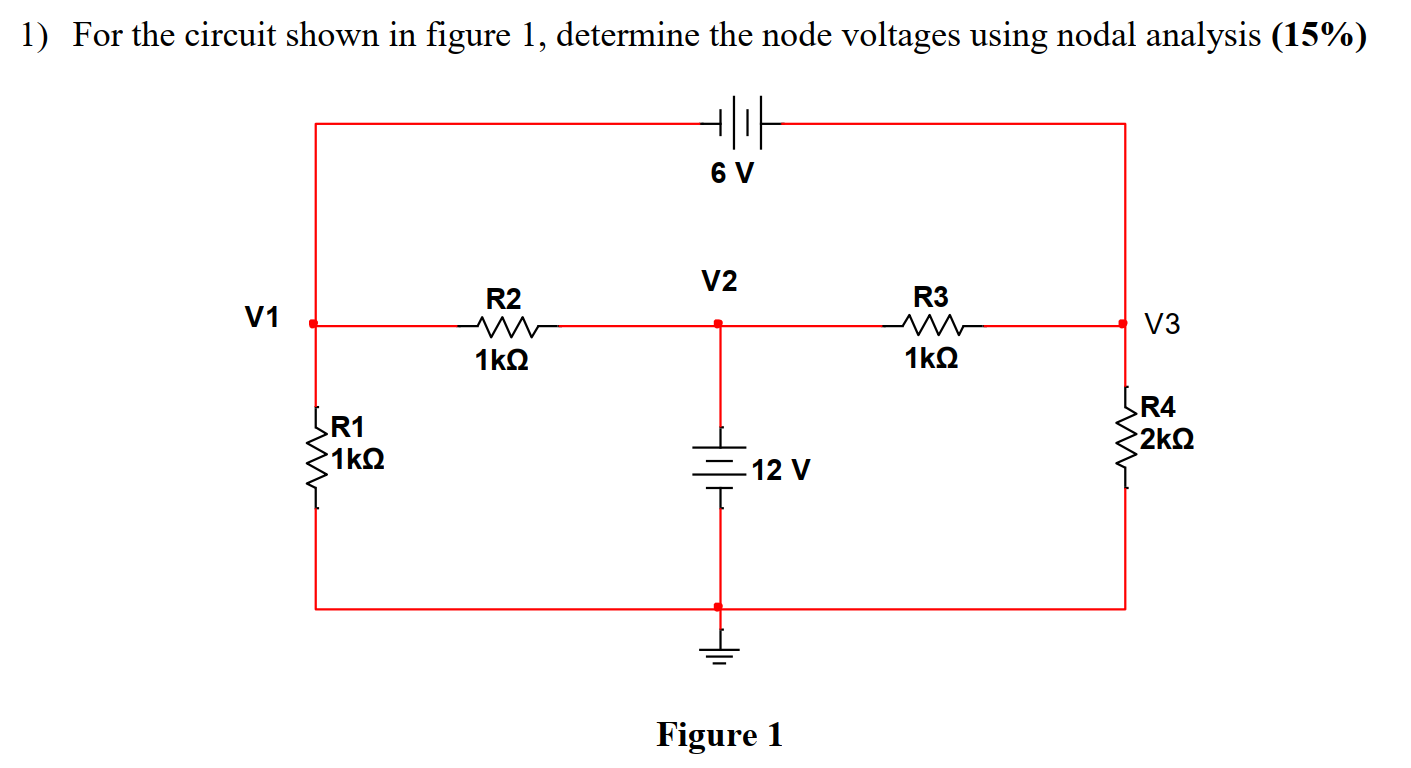

In [117]:
v1, v3 = sp.symbols('V_1, V_3')
v2 = 12

$$
V_3 - V_1 = 6
$$

In [118]:
supernode_constraint = sp.Eq(v3-v1, 6)
supernode_constraint

Eq(-V_1 + V_3, 6)

In [119]:
sv1 = sp.solve(supernode_constraint,v1)[0]
sv1

V_3 - 6

In [120]:
sv3 = sp.solve(supernode_constraint,v3)[0]
sv3

V_1 + 6

#### Node A

In [121]:
na = (v1)/1e3 + ((v1)-12)/1e3
na

0.002*V_1 - 0.012

#### Node B

In [122]:
nb = v3/2e3 + (v3-12)/1e3
nb

0.0015*V_3 - 0.012

#### Supernode

In [123]:
ns = na + nb
ns

0.002*V_1 + 0.0015*V_3 - 0.024

In [130]:
eq1 = sp.Eq(ns, 0)
eq1

Eq(0.002*V_1 + 0.0015*V_3 - 0.024, 0)

In [131]:
eq1.subs({v3: sv3})

Eq(0.0035*V_1 - 0.015, 0)

In [125]:
sp.solve(eq1.subs({v3: sv3}), v1)[0]

4.28571428571429

In [126]:
sp.solve(eq1.subs({v1: sv1}), v3)[0]

10.2857142857143